<a href="https://colab.research.google.com/github/LEGENDRANGER-algorithum/LEGENDRANGER-algorithum/blob/main/Explainable_Sleep_Disorder_Prediction_from_Lifestyle_and_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML project

In [ ]:
import pandas as pd
try:
    df_orginal = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
    display(df_orginal)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# 1. Check missing values in each column
df=df_orginal.copy()
print("Missing values per column (before):")
print(df.isnull().sum())

# 2. Replace nulls in 'Sleep Disorder' column with 'ok'
if df['Sleep Disorder'].isnull().sum() > 0:
    df['Sleep Disorder'].fillna('ok', inplace=True)

# 3. Verify all nulls are handled
print("\nMissing values per column (after):")
print(df.isnull().sum())

Missing values per column (before):
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Missing values per column (after):
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


/tmp/ipython-input-905687760.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('ok', inplace=True)


In [ ]:
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


In [50]:
from sklearn.preprocessing import LabelEncoder

# Make a copy so the original df remains unchanged
# df_encoded = df.copy() # No longer needed for this approach
# encode_cols = ["Occupation", "BMI Category", "Sleep Disorder", "Gender"] # No longer needed for this approach

# Apply Label Encoding (removed as OneHotEncoder in pipeline handles encoding)
# le = LabelEncoder()
# for col in encode_cols:
#     df_encoded[col] = le.fit_transform(df_encoded[col])

# Show first 5 rows of the transformed dataset (no longer needed for this approach)
# print(df_encoded.head())

In [ ]:
display(df);

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,ok
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,ok
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,ok
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
sleep_disorder_column = df['Sleep Disorder']
display(sleep_disorder_column)

In [24]:
# Ensure categorical data is encoded before splitting
from sklearn.model_selection import train_test_split

# Encoding categorical columns (already done previously)
encode_cols = ["Gender", "Occupation", "BMI Category"]
le = LabelEncoder()

for col in encode_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Drop target column and ID columns for features
X = df_encoded.drop(columns=["Sleep Disorder", "Person ID"])
y = df_encoded["Sleep Disorder"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Drop ID and target from features
X = df.drop(columns=["Sleep Disorder", "Person ID"])

# Target column
y = df["Sleep Disorder"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(y.value_counts())   # to check class distribution


Features shape: (374, 11)
Target shape: (374,)
Sleep Disorder
ok             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##model training and evulation

In [26]:
# If "Blood Pressure" is in the dataset, process it correctly
if "Blood Pressure" in df_encoded.columns:
    # Extract Systolic and Diastolic values (separated by '/')
    bp = df_encoded["Blood Pressure"].astype(str).str.extract(r'(?P<Systolic>\d+)\s*/\s*(?P<Diastolic>\d+)')

    # Convert the extracted values to numeric
    df_encoded["Systolic"] = pd.to_numeric(bp["Systolic"], errors="coerce")
    df_encoded["Diastolic"] = pd.to_numeric(bp["Diastolic"], errors="coerce")

    # Drop the original 'Blood Pressure' column after extraction
    df_encoded.drop(columns=["Blood Pressure"], inplace=True)
# Drop target column and ID columns
X = df_encoded.drop(columns=["Sleep Disorder", "Person ID"])
y = df_encoded["Sleep Disorder"]

# Ensure no remaining non-numeric columns, as LinearRegression requires all features to be numeric
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
# Train the model
lr = LinearRegression()
lr.fit(X, y)

# Evaluate the model
score = lr.score(X_test, y_test)  # Ensure X_test and y_test are also encoded and numeric
print("R² Score:", score)


R² Score: 0.6665371769730213


In [34]:
import joblib, pandas as pd, numpy as np

# 1) মডেল লোড
model = joblib.load("sleep_rf_model.joblib")

# 2) মডেল যেসব কলাম আশা করে সেটা পাওয়া (sklearn >=1.0 হলে কাজ করবে)
expected_cols = list(model.named_steps["pre"].feature_names_in_)
print("Expected columns:\n", expected_cols)

# 3) নতুন র’ ডাটা (টেক্সট ক্যাটেগরি + নাম্বার)
new_data_raw = {
    "Gender": "Male",                 # string
    "Age": 35,
    "Occupation": "Software Engineer",# string
    "Sleep Duration": 6.2,
    "Quality of Sleep": 6,
    "Physical Activity Level": 42,
    "Stress Level": 6,
    "BMI Category": "Overweight",     # string
    "Systolic": 126,
    "Diastolic": 83,
    "Heart Rate": 77,
    "Daily Steps": 4200
}

# 4) DataFrame বানিয়ে expected_cols অর্ডারে সাজানো
new_df = pd.DataFrame([new_data_raw])

# যেসব কলাম মিসিং আছে সেগুলো যোগ করে নাও (NaN দিয়ে), তারপর exact order সেট করো
for c in expected_cols:
    if c not in new_df.columns:
        new_df[c] = np.nan
new_df = new_df[expected_cols]

# 5) প্রেডিক্ট
pred = model.predict(new_df)
print("Predicted Sleep Disorder:", pred[0])


Expected columns:
 ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
Predicted Sleep Disorder: Sleep Apnea


=== Random Forest — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.79      1.00      0.88        15
 Sleep Apnea       1.00      0.93      0.97        60

    accuracy                           0.95        75
   macro avg       0.89      0.97      0.92        75
weighted avg       0.96      0.95      0.95        75



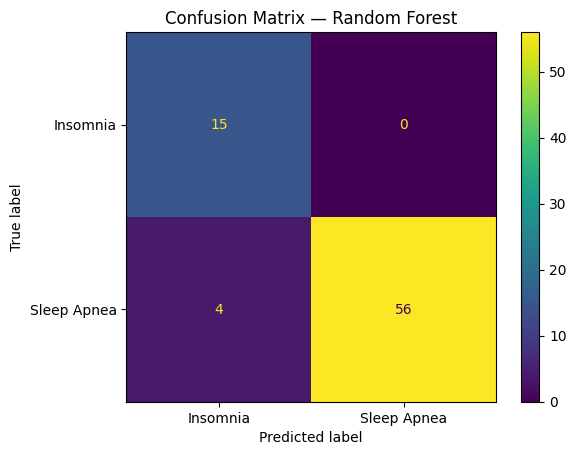


Top 15 features:
                 feature  importance
         Sleep Duration    0.187032
            Daily Steps    0.152351
Physical Activity Level    0.116131
               Systolic    0.091629
                    Age    0.081263
              Diastolic    0.076977
       Quality of Sleep    0.052918
BMI Category_Overweight    0.047805
    BMI Category_Normal    0.044236
           Stress Level    0.033591
             Heart Rate    0.022093
       Occupation_Nurse    0.019489
     Occupation_Teacher    0.012989
 Occupation_Salesperson    0.012644
      Occupation_Doctor    0.011615


['sleep_rf_model.joblib']

In [35]:
# Ensure categorical data is encoded
encode_cols = ["Gender", "Occupation", "BMI Category"]
le = LabelEncoder()

for col in encode_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Handle missing values
df["Sleep Disorder"].fillna(df["Sleep Disorder"].mode()[0], inplace=True)

# Split into features and target
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess and train model
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

numeric_tf = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
categorical_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer([("num", numeric_tf, num_cols), ("cat", categorical_tf, cat_cols)])

# Train model
rf = Pipeline([("pre", preprocess), ("clf", RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced_subsample"))])
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print("=== Random Forest — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Random Forest")
plt.show()

# Feature importance
try:
    ohe = rf.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]
    cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])
    feat_names = np.concatenate([np.array(num_cols), cat_names])
    importances = rf.named_steps["clf"].feature_importances_
    fi = pd.DataFrame({"feature": feat_names, "importance": importances})
    fi = fi.sort_values("importance", ascending=False).head(15)
    print("\nTop 15 features:\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)

# Save model
joblib.dump(rf, "sleep_rf_model.joblib")

In [30]:
# training ফেজে
import joblib
joblib.dump(list(X.columns), "expected_columns.joblib")

# inference ফেজে
expected_cols = joblib.load("expected_columns.joblib")


=== SVM — Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.87      0.81      0.84        16
           2       0.98      0.95      0.97        44

    accuracy                           0.92        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.92      0.92      0.92        75



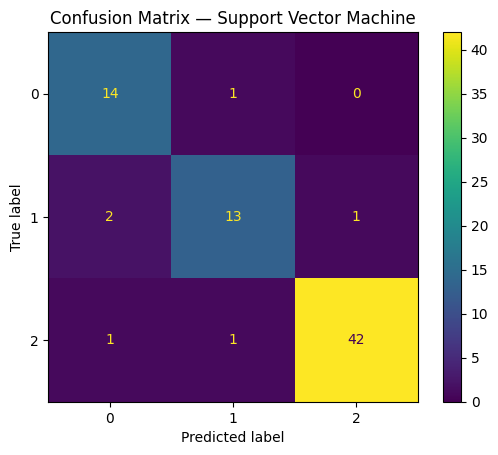

Feature-importance listing skipped: All arrays must be of the same length

Saved model -> sleep_svm_model.joblib


In [37]:
# Train the model
svm.fit(X_train, y_train)

# Evaluate model
y_pred = svm.predict(X_test)
print("=== SVM — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()

# Feature importance (after fitting the model)
try:
    # Access the OneHotEncoder after the model is trained
    ohe = svm.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

    # Get the feature names after fitting the OneHotEncoder
    cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])

    # Combine numerical and categorical feature names
    feat_names = np.concatenate([np.array(num_cols), cat_names])

    # Get feature importance for SVM with linear kernel
    feature_importance = svm.named_steps["clf"].coef_.flatten()

    # Create a DataFrame for feature importance
    fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})

    # Sort and print the top 15 important features
    fi = fi.sort_values("importance", ascending=False).head(15)
    print("\nTop 15 features:\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)

# Save the model
joblib.dump(svm, "sleep_svm_model.joblib")
print("\nSaved model -> sleep_svm_model.joblib")


=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      1.00      0.94        15
 Sleep Apnea       1.00      0.97      0.98        60

    accuracy                           0.97        75
   macro avg       0.94      0.98      0.96        75
weighted avg       0.98      0.97      0.97        75



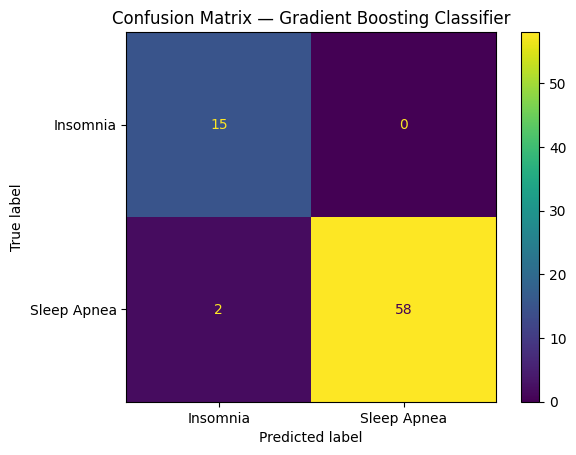


Top 15 features:
                         feature  importance
                       Systolic    0.400496
        Physical Activity Level    0.262000
                 Sleep Duration    0.217830
                            Age    0.044896
                    Daily Steps    0.020115
Occupation_Sales Representative    0.009606
               Quality of Sleep    0.008311
                      Diastolic    0.007675
                     Heart Rate    0.005155
            Occupation_Engineer    0.004342
          Occupation_Accountant    0.003550
   Occupation_Software Engineer    0.003382
           Occupation_Scientist    0.003185
         Occupation_Salesperson    0.002830
             Occupation_Teacher    0.002156

Saved model -> sleep_gbc_model.joblib


In [51]:
# Train the model first
gbc.fit(X_train, y_train)

# Evaluate the model
y_pred = gbc.predict(X_test)
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

# Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Now, the OneHotEncoder has been fitted, so you can retrieve feature names for categorical columns
ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

# Retrieve feature names for the categorical columns
cat_names = list(ohe.get_feature_names_out(cat_cols))

# Combine numerical and categorical feature names
feat_names = np.concatenate([num_cols, cat_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))

# Save the model to a file
joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


Data types in X_train before ColumnTransformer:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Systolic                     int64
Diastolic                    int64
dtype: object

Identified numerical columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
Identified categorical columns: ['Gender', 'Occupation', 'BMI Category']
=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      1.00      0.94        15
 Sleep Apnea       1.00      0.97      0.98        60

    accuracy                           0.97   

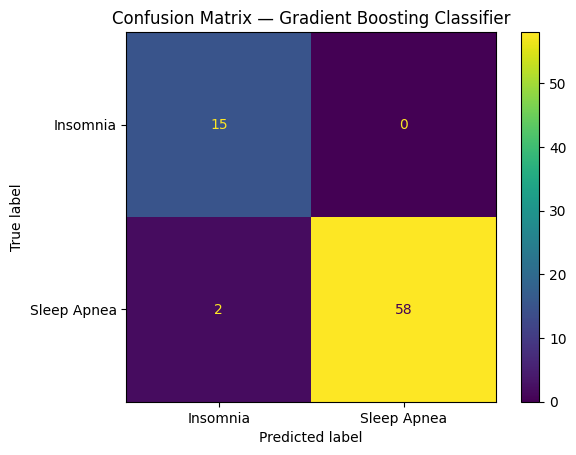


Top 15 features:
                         feature  importance
                       Systolic    0.400496
        Physical Activity Level    0.262000
                 Sleep Duration    0.217830
                            Age    0.044896
                    Daily Steps    0.020115
Occupation_Sales Representative    0.009606
               Quality of Sleep    0.008311
                      Diastolic    0.007675
                     Heart Rate    0.005155
            Occupation_Engineer    0.004342
          Occupation_Accountant    0.003550
   Occupation_Software Engineer    0.003382
           Occupation_Scientist    0.003185
         Occupation_Salesperson    0.002830
             Occupation_Teacher    0.002156

Saved model -> sleep_gbc_model.joblib


In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with initial handling of missing 'Sleep Disorder' values
# and 'Systolic' and 'Diastolic' columns added from 'Blood Pressure'

# Drop 'Person ID' and the target variable 'Sleep Disorder' from the features
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns in the training data
# Explicitly check dtypes in X_train
print("Data types in X_train before ColumnTransformer:")
print(X_train.dtypes)

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Ensure cat_cols are the actual column names in X_train that are objects or strings
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nIdentified numerical columns:", num_cols)
print("Identified categorical columns:", cat_cols)


# Preprocess and train model
# Numeric pipeline (impute and scale)
numeric_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),  # Handle missing values
    ("sc", StandardScaler())  # Standardize numerical features
])

# Categorical pipeline (impute and one-hot encode)
categorical_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical values
    ("oh", OneHotEncoder(handle_unknown="ignore"))  # One-hot encoding for categorical features
])

# Preprocessing step to combine both numerical and categorical transformations
preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

# Train the Gradient Boosting Classifier (GBC) model
gbc = Pipeline([
    ("pre", preprocess),  # Apply preprocessing to data
    ("clf", GradientBoostingClassifier(n_estimators=200, random_state=42))  # Gradient Boosting Classifier
])

# 7. Fit the model to the training data
gbc.fit(X_train, y_train)

# 8. Evaluate the model
y_pred = gbc.predict(X_test)

# Print the classification report
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

# 9. Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Get feature names from the one-hot encoder for categorical columns
# Access the preprocessor step from the pipeline
preprocessor = gbc.named_steps['pre']

# Get the fitted OneHotEncoder from the categorical transformer
ohe = preprocessor.named_transformers_['cat'].named_steps['oh']

# Get the feature names for the categorical columns from the fitted OneHotEncoder
# Retrieve the fitted column names from the ColumnTransformer
fitted_cat_cols = preprocessor.transformers_[1][2] # Index 1 is the 'cat' transformer


# Get the feature names for the categorical columns using the fitted encoder
cat_feature_names = ohe.get_feature_names_out(fitted_cat_cols)


# Combine numerical and categorical feature names
# Get the numerical column names from the fitted ColumnTransformer
# Note: ColumnTransformer.transformers_ stores the actual columns used after fitting
fitted_num_cols = preprocessor.transformers_[0][2] # Index 0 is the 'num' transformer


feat_names = np.concatenate([fitted_num_cols, cat_feature_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
# Ensure sorting is applied correctly
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))

# 10. Save the model to a file
joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


Top 15 features:
                         feature  importance
                       Systolic    0.400496
        Physical Activity Level    0.262000
                 Sleep Duration    0.217830
                            Age    0.044896
                    Daily Steps    0.020115
Occupation_Sales Representative    0.009606
               Quality of Sleep    0.008311
                      Diastolic    0.007675
                     Heart Rate    0.005155
            Occupation_Engineer    0.004342
          Occupation_Accountant    0.003550
   Occupation_Software Engineer    0.003382
           Occupation_Scientist    0.003185
         Occupation_Salesperson    0.002830
             Occupation_Teacher    0.002156


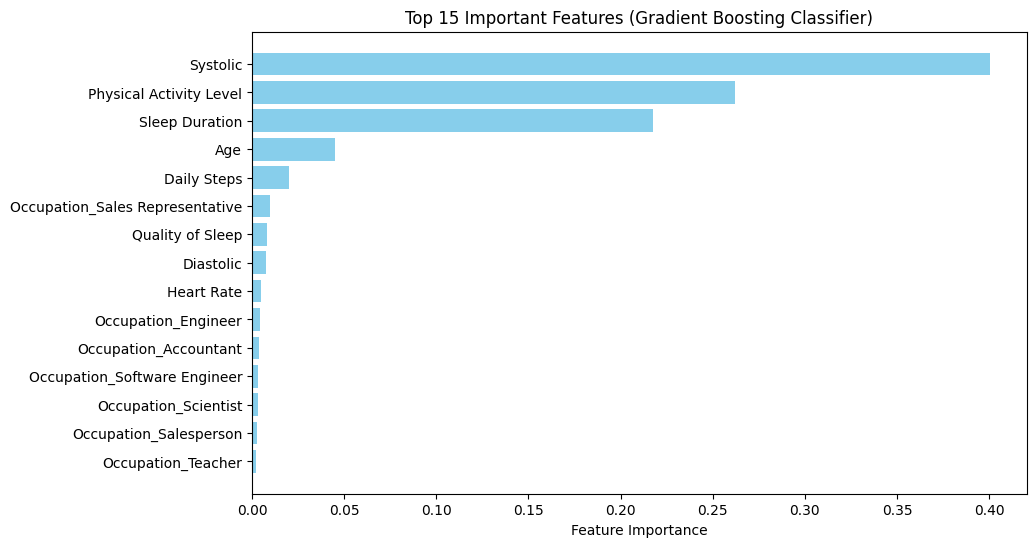

In [52]:
# Feature importance (from the trained model)
feature_importance = gbc.named_steps["clf"].feature_importances_

# Get feature names from the one-hot encoder for categorical columns
ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

# Retrieve feature names for the categorical columns
cat_names = list(ohe.get_feature_names_out(cat_cols))

# Combine numerical and categorical feature names
feat_names = np.concatenate([num_cols, cat_names])

# Create DataFrame for feature importance
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

# Print the top 15 important features
print("\nTop 15 features:\n", fi.to_string(index=False))

# Bar Chart for Feature Importance
plt.figure(figsize=(10,6))
plt.barh(fi['feature'], fi['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features (Gradient Boosting Classifier)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()
